# Laborator 10

Folosind un set de date - de exemplu de la https://archive.ics.uci.edu/ml/datasets.php?format=&task=&att=&area=&numAtt=&numIns=&type=text&sort=taskDown&view=table - sa se rezolve o problema de clasificare sau regresie, plecand de la intrari de tip text.

Se poate opta pentru codificare BOW, n-grams, word2vec sau altele adecvate. Modelele de predictie pot fi din biblioteca scikit-learn. Puteti folosi pentru preprocesare biblioteca [NLTK](https://www.nltk.org) etc.

Pentru clasificare se va optimiza scorul F1; se vor raporta scorurile F1, accuracy. Pentru regresie se va optimia scorul mean squared error; se vor raporta scorurile MSE, mean absolute error, r2.

Exemple:
1. [Clasificare de SMS-uri](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection)
1. [Sentence Classification Data Set](https://archive.ics.uci.edu/ml/datasets/Sentence+Classification#)
1. [Sentiment Labelled Sentences Data Set](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences)
1. [Victorian Era Authorship Attribution Data Set](https://archive.ics.uci.edu/ml/datasets/Victorian+Era+Authorship+Attribution)
1. [Amazon Commerce reviews set Data Set](https://archive.ics.uci.edu/ml/datasets/Amazon+Commerce+reviews+set)
1. [Farm Ads Data Set](https://archive.ics.uci.edu/ml/datasets/Farm+Ads)
1. etc...


Se vor investiga minim 2 seturi de date si pentru fiecare din ele minim 4 modele de clasificare sau regresie. Daca setul de date e deja impartit in train si test, se va folosi ca atare - setul de antrenare se va imparti, suplimentar in train + validation; altfel, se va face kfold CV, k=5. Valorile optimale ale hiperparametrilor vor fi alesi prin random search si grid search.

Pentru fiecare set de date:
1. Se descrie setul de date, in limba romana (continut, provenienta, problema etc.)
1. Se face analiza exploratorie, folosind cod Python: distributia claselor sau a valorilor continue de iesire - numeric si grafic, statistici asupra textelor (de exemplu: lungime minima/medie/maxima; cele mai frecvente k cuvinte; clustering etc.). Se va explica fiecare pas si ce se urmareste prin efectuarea lui. Graficele vor avea axele numite (ce se reprezinta, evetual unitate de masura)
1. Se face preprocesare de date; se explica in limba romana care sunt metodele de preprocesare folosite, efectul lor pe datele de intrare, ce forma are iesirea obtinuta; se arata efectele pasilor de preprocesare asupra setului de date (noul numar de documente, dinamica vocabularului, trasaturile rezultate etc.) Se pot aduga grafice si tabele la acest pas.
1. Clasificare sau regresie, dupa caz: se face o descriere a modelelor considerate, in limba romana; se descrie modalitatea de cautare a hiperparametrilor; rezultatele obtinute se vor prezenta tabelar, similar cu tema precedenta. 

Descrierea modelelor si a pasilor de preprocesare pot fi in sectiuni separate, cu referinte la acestea unde e necesar. Partea specifica aplicarii pasilor pe datele considerate va fi prezentata respectand ordinea de aplicare. 

Exemple:
1. [Working With Text Data](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html)
1. [Text Classification with Python and Scikit-Learn](https://stackabuse.com/text-classification-with-python-and-scikit-learn/)
1. [How to Prepare Text Data for Machine Learning with scikit-learn](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)

Prezentarea temei se va face in saptamana 20-24 mai.

In [67]:
import warnings
warnings.filterwarnings('ignore')

In [68]:
import numpy as np  
import re  
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords  
from sklearn.datasets import load_files  
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords  

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [69]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [72]:
from sklearn.feature_extraction.text import CountVectorizer 

## Additional functions

In [73]:
def get_metrics(scores):
    train_f1 = np.mean(scores['train_f1'])
    train_acc = np.mean(scores['train_accuracy'])
    test_f1 = np.mean(scores['test_f1'])
    test_acc = np.mean(scores['test_accuracy']) 

    fit_time = np.mean(scores['fit_time'])
    score_time = np.mean(scores['score_time'])
    
    metrics = [train_f1, train_acc, test_f1, test_acc, fit_time, score_time]
    return metrics

## 1. Movie Review Dataset 

In [74]:
movie_data = load_files('review_polarity/txt_sentoken/')
X, y = movie_data.data, movie_data.target

print('The number of movie reviews from users:', len(X), '\nThe number of associated verdicts:', len(y))

print('\nText: ', X[1])
print('Verdict: ', y[1])

The number of movie reviews from users: 2000 
The number of associated verdicts: 2000

Text:  b"good films are hard to find these days . \ngreat films are beyond rare . \nproof of life , russell crowe's one-two punch of a deft kidnap and rescue thriller , is one of those rare gems . \na taut drama laced with strong and subtle acting , an intelligent script , and masterful directing , together it delivers something virtually unheard of in the film industry these days , genuine motivation in a story that rings true . \nconsider the strange coincidence of russell crowe's character in proof of life making the moves on a distraught wife played by meg ryan's character in the film -- all while the real russell crowe was hitching up with married woman meg ryan in the outside world . \ni haven't seen this much chemistry between actors since mcqueen and mcgraw teamed up in peckinpah's masterpiece , the getaway . \nbut enough with the gossip , let's get to the review . \nthe film revolves around 

### Analiza 

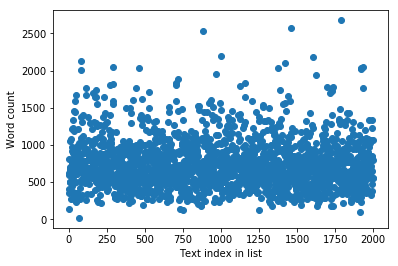

In [75]:
word_counts = [len(item.split()) for item in X]
plt.xlabel('Text index in list')
plt.ylabel('Word count')
plt.scatter(range(len(X)), word_counts)

Review-urile sunt concentrate ca si lungime in zona 0-1500, dar rareori se intalnesc si review-uri cu peste 2000 de cuvinte.

In [76]:
print('Lungimea minimă a unui review: ', min([len(item) for item in X]))
print('Lungimea medie a review-urilor: ', np.mean([len(item) for item in X]))
print('Lungimea maximă a unui review: ', max([len(item) for item in X]))

Lungimea minimă a unui review:  91
Lungimea medie a review-urilor:  3893.002
Lungimea maximă a unui review:  14957


[]

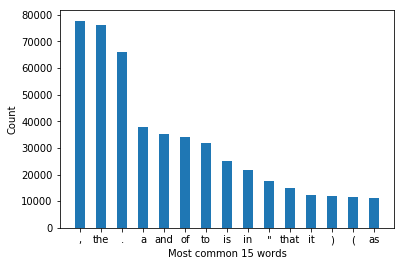

In [77]:
words = [item.split() for item in X]
words = [[item.decode('utf-8') for item in sentence] for sentence in words]
words = [item for sublist in words for item in sublist]

from collections import Counter
counter = Counter(words)
most_common = counter.most_common(15)

most_common_words = [item[0] for item in most_common]
counts = [item[1] for item in most_common]

plt.bar(most_common_words, counts, width = 0.5)
plt.xlabel('Most common 15 words')
plt.ylabel('Count')
plt.plot()

Cele mai comune 15 cuvinte care apar sunt stopwords, asa ca acestea vor fi eliminate. 

In [78]:
documents = []

from nltk.stem import WordNetLemmatizer

stemmer = WordNetLemmatizer()

for sen in range(0, len(X)):  
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen]))

    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 

    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)

    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)

    # Converting to Lowercase
    document = document.lower()

    # Lemmatization
    document = document.split()

    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)

    documents.append(document)

In [79]:
print('\nText after removing stop-words:', documents[1])


Text after removing stop-words: good film are hard to find these day ngreat film are beyond rare nproof of life russell crowe one two punch of deft kidnap and rescue thriller is one of those rare gem na taut drama laced with strong and subtle acting an intelligent script and masterful directing together it delivers something virtually unheard of in the film industry these day genuine motivation in story that ring true nconsider the strange coincidence of russell crowe character in proof of life making the move on distraught wife played by meg ryan character in the film all while the real russell crowe wa hitching up with married woman meg ryan in the outside world ni haven seen this much chemistry between actor since mcqueen and mcgraw teamed up in peckinpah masterpiece the getaway nbut enough with the gossip let get to the review nthe film revolves around the kidnapping of peter bowman david morse an american engineer working in south america who is kidnapped during mass ambush of ci

In [80]:
# converts text to numbers
from sklearn.feature_extraction.text import CountVectorizer  
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))  
X = vectorizer.fit_transform(documents).toarray()  

## 2. SMS Spam Collection Data Set 


In [81]:
sms = load_files('SMS')
X, y = sms.data, sms.target  

print('The number of reviews:', len(X), '\nThe number of associated verdicts: ', len(y))

print('\nText: ', X[0])
print('Verdict: ', y[0])

The number of reviews: 5574 
The number of associated verdicts:  5574

Text:  b'ham\tGuy, no flash me now. If you go call me, call me. How madam. Take care oh.'
Verdict:  1


### Analiza 

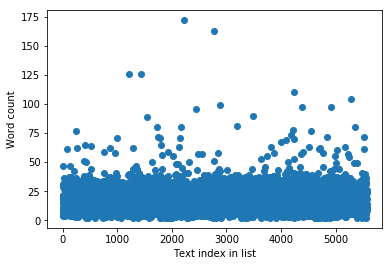

In [82]:
word_counts = [len(item.split()) for item in X]
plt.xlabel('Text index in list')
plt.ylabel('Word count')
plt.scatter(range(len(X)), word_counts)

SMS-urile sunt concentrate ca si lungime intre 0-50, dar rareori se intalnesc si SMS-uri de peste 75 de cuvinte.

In [83]:
print('Lungimea minimă a unui SMS: ', min([len(item) for item in X]))
print('Lungimea medie a SMS-urilor: ', np.mean([len(item) for item in X]))
print('Lungimea maximă a unui SMS: ', max([len(item) for item in X]))

Lungimea minimă a unui SMS:  6
Lungimea medie a SMS-urilor:  84.73860782203086
Lungimea maximă a unui SMS:  914


[]

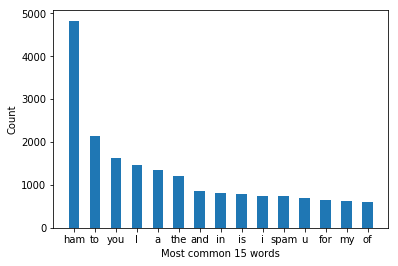

In [84]:
words = [item.split() for item in X]
words = [[item.decode('utf-8') for item in sentence] for sentence in words]
words = [item for sublist in words for item in sublist]

from collections import Counter
counter = Counter(words)
most_common = counter.most_common(15)

most_common_words = [item[0] for item in most_common]
counts = [item[1] for item in most_common]

plt.bar(most_common_words, counts, width = 0.5)
plt.xlabel('Most common 15 words')
plt.ylabel('Count')
plt.plot()

Cele mai comune 15 cuvinte care apar sunt stopwords, asa ca acestea vor fi eliminate. 

In [85]:
documents = []

from nltk.stem import WordNetLemmatizer

stemmer = WordNetLemmatizer()

for sen in range(0, len(X)):  
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen]))
    
    #Remove word ham
    document = re.sub(r'\bham\b\s+', ' ', document)
    
    #Remove word spam
    document = re.sub(r'\bspam\b\s+', ' ', document)

    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 

    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)

    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)

    # Converting to Lowercase
    document = document.lower()

    # Lemmatization
    document = document.split()

    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)

    documents.append(document)

In [86]:
print('\nText after removing stop-words:', documents[0])


Text after removing stop-words: tguy no flash me now if you go call me call me how madam take care oh


In [87]:
# converts text to numbers
from sklearn.feature_extraction.text import CountVectorizer  
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))  
X = vectorizer.fit_transform(documents).toarray()  